# Analyse of oscilloscope and camera data

In [2]:
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import matplotlib.dates as mdates
import datetime

%pylab inline --no-import-all

file = "/storage/experiments/2021/0807_bourka_sobeslav"
file = "/storage/experiments/2021/0822_bourka_sobeslav_auto1/slavia/1629713811.182914.csv"


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_table(file, sep=',', header=0)

In [4]:
df['time']=df.index*8e-9 # fillin of correct sample time

In [5]:
df.set_index('time', inplace=True)
#df.drop(df.columns[2], inplace=True, axis=1)
#df.drop(df.columns[2], inplace=True, axis=1)
#df.drop(df.columns[2], inplace=True, axis=1)

## Save to HDF

In [6]:
cols_to_keep = ['CH1(V)', 'CH2(V)']
df.index = pd.to_datetime(df.index, unit='s')
df.loc[:, cols_to_keep].to_hdf(file+'.hdf','df', mode='w')

## Read data

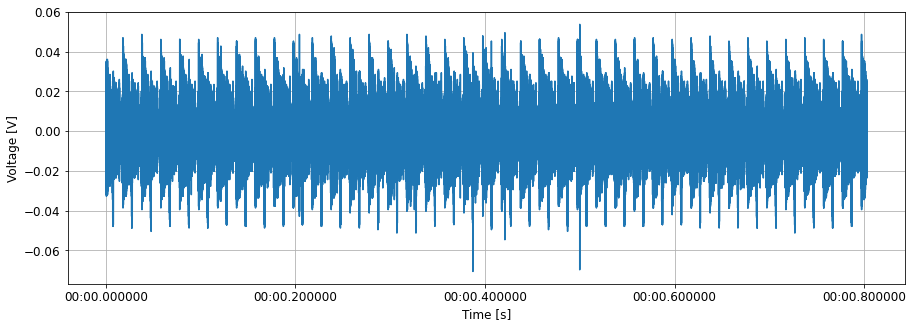

In [97]:
# Read oscilloscope data
df=pd.read_hdf(file+'.hdf')
plt.figure(figsize=(15,5))
plt.plot(df['CH2(V)'])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()

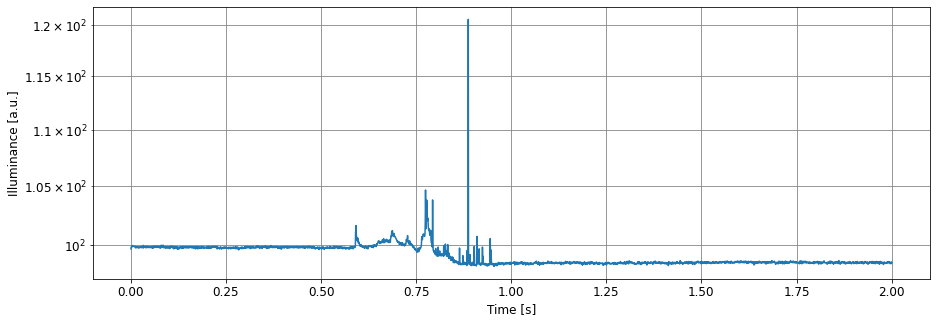

In [4]:
# Read illuminance data
f = "/storage/experiments/2021/0822_bourka_sobeslav_auto1/video/1629713811.182914.mp4.csv"
y = pd.read_csv(f)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

#y['time'] = (y.index - 1613)*(1/1610)
y['time'] = (y.index)*(1/1610)

plt.plot(y['time'], y['0'])
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.xticks(np.arange(0, 4000, 100))


## Resample oscilloscope data

In [90]:
def custom_resampler(arraylike):
    return np.log(np.mean(arraylike))

#xx = df.resample('1us', closed='left').mean()
#xx = df.resample('1us', closed='left').apply(custom_resampler)
xx = df.resample('1us', closed='left').mean()


# Plot antenna and camera data together

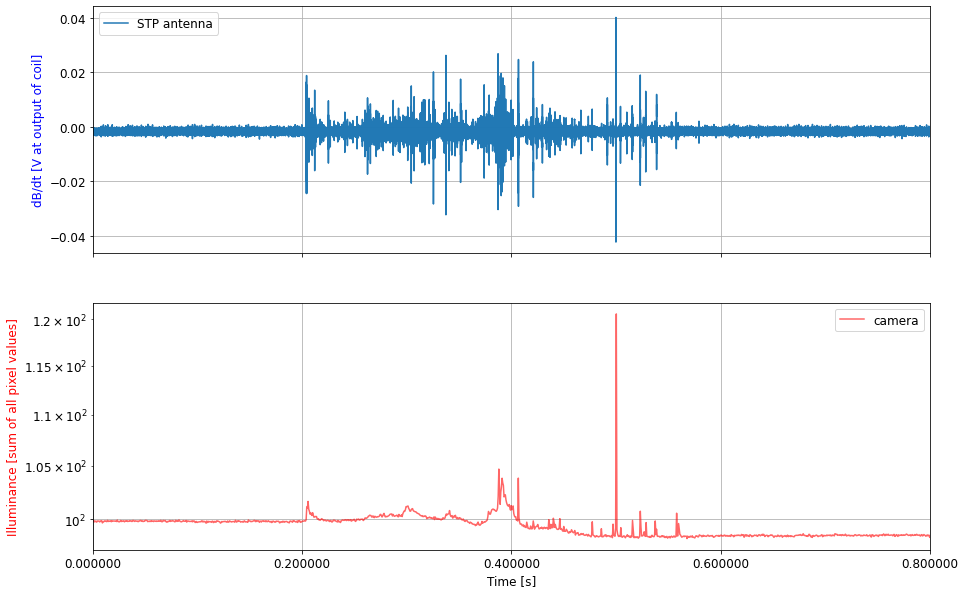

In [91]:
fig, (ax1,  ax2) = plt.subplots(figsize=(15, 10), nrows=2, sharex=True)

ax1.plot(xx['CH2(V)'], label='STP antenna', alpha=0.99)
#plt.xlabel('Time [s]')
ax1.set_ylabel('dB/dt [V at output of coil]', c='b')
ax1.grid()
ax1.legend(loc = "upper left")

ax1.set_xlim(pd.to_datetime(0, unit='s'),pd.to_datetime(0.8, unit='s'))

#y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')
y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.615, unit='s')

ax2.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
ax2.set_yscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Illuminance [sum of all pixel values]', c='r')
ax2.grid()
ax2.legend(loc = "upper right")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('0.%f'))
#plt.ylim(90,10e2)

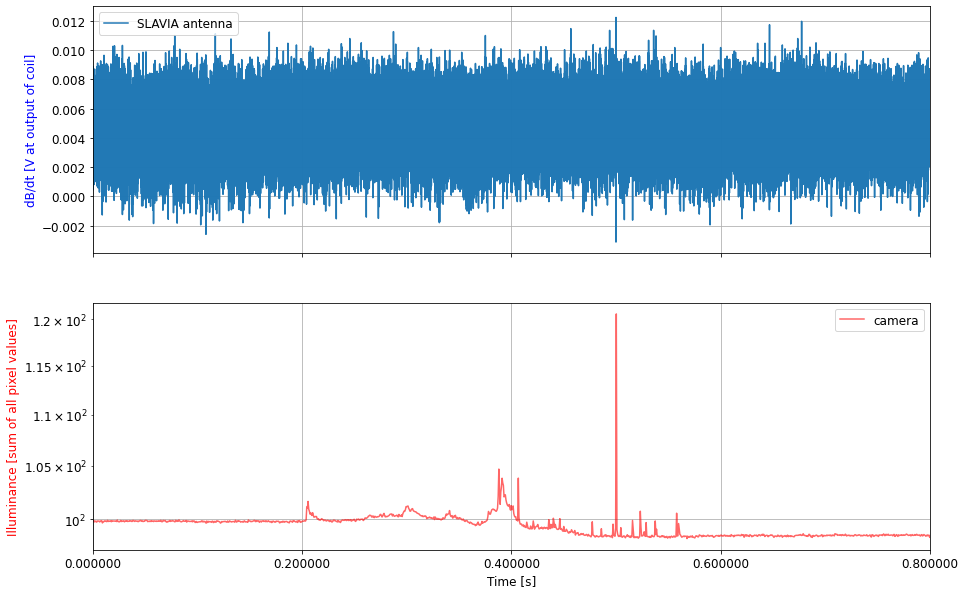

In [92]:
fig, (ax1,  ax2) = plt.subplots(figsize=(15, 10), nrows=2, sharex=True)

#FROM_TIME = 0.406
#TO_TIME = 0.408
#FROM_TIME = 0.2
#TO_TIME = 0.6
#xx = df.loc[pd.to_datetime(FROM_TIME, unit='s'):pd.to_datetime(TO_TIME, unit='s')]
#xx = df.loc[pd.to_datetime(FROM_TIME, unit='s'):pd.to_datetime(TO_TIME, unit='s')]

ax1.plot(xx['CH1(V)'], label='SLAVIA antenna', alpha=0.99)
#plt.xlabel('Time [s]')
ax1.set_ylabel('dB/dt [V at output of coil]', c='b')
ax1.grid()
ax1.legend(loc = "upper left")

ax1.set_xlim(pd.to_datetime(0, unit='s'),pd.to_datetime(0.8, unit='s'))

#y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')
y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.615, unit='s')

ax2.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
ax2.set_yscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Illuminance [sum of all pixel values]', c='r')
ax2.grid()
ax2.legend(loc = "upper right")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('0.%f'))
#plt.ylim(90,10e2)
#plt.xlim(pd.to_datetime(FROM_TIME, unit='s'),pd.to_datetime(TO_TIME, unit='s'))

In [4]:
xx = df[0.4:0.5]
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.plot(xx['CH1(V)'], label='CH1')
plt.plot(xx['CH2(V)'], label='CH2')
#plt.ylim(-0.1,0)
plt.legend()
plt.grid()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0.4] of type float

In [45]:

#df.loc['00:00:00.100':'00:00:00.200']
FROM_TIME = 0.4
TO_TIME = 0.5
#df.between_time(pd.to_datetime(FROM_TIME, format='%S.%f', errors='ignore'),pd.to_datetime(TO_TIME, format='%S.%f', errors='ignore'))

pd.to_datetime(FROM_TIME, format='%S.%f', errors='ignore')
df.loc[pd.to_datetime(FROM_TIME, unit='s'):pd.to_datetime(TO_TIME, unit='s')]

,CH1(V),CH2(V)
time,,
1970-01-01 00:00:00.400000000,0.000000,0.000000
1970-01-01 00:00:00.400000008,0.014711,0.000000
1970-01-01 00:00:00.400000016,0.022067,0.000000
1970-01-01 00:00:00.400000024,-0.044134,0.000000
1970-01-01 00:00:00.400000032,0.022067,0.000841
...,...,...
1970-01-01 00:00:00.499999968,0.080912,0.021015
1970-01-01 00:00:00.499999976,-0.150791,0.030262
1970-01-01 00:00:00.499999984,-0.139758,0.044552


# Light curve with antenna

In [3]:
#f = "/storage/experiments/2021/0807_bourka_sobeslav" + "/video/1628431195.5110645.mp4.csv"
#df=pd.read_hdf(file+'/slavia/hdf/RigolDS0.csv.hdf')
#f = "/storage/experiments/2021/0725_bourka_ratmirov" + "/video/1627302288.9546976.mp4.csv"
#df=pd.read_hdf(file+'/slavia/hdf/RigolDS1.csv.hdf')
f = "/storage/experiments/2021/0822_bourka_sobeslav_auto1/video/1629713811.182914.mp4.csv"
df=pd.read_hdf(file+'.hdf')
#f = "/storage/experiments/2021/0725_bourka_ratmirov" + "/video/1627302184.9854863.mp4.csv"
#df=pd.read_hdf(file+'/slavia/hdf/RigolDS2.csv.hdf')
df['CH2(V)']

time
0.000000e+00   -0.001681
8.000000e-09   -0.001681
1.600000e-08   -0.001681
2.400000e-08   -0.000841
3.200000e-08   -0.000841
                  ...   
8.028160e-01   -0.000841
8.028160e-01   -0.000841
8.028160e-01   -0.001681
8.028160e-01   -0.001681
8.028160e-01   -0.001681
Name: CH2(V), Length: 100352000, dtype: float64

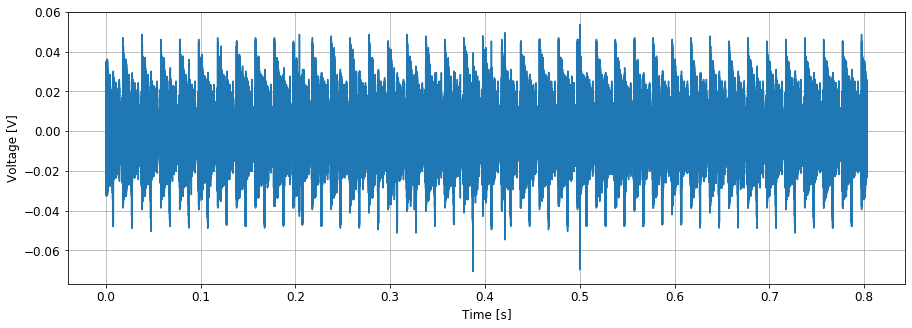

In [71]:
plt.figure(figsize=(15,5))
plt.plot(df['CH2(V)'])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()

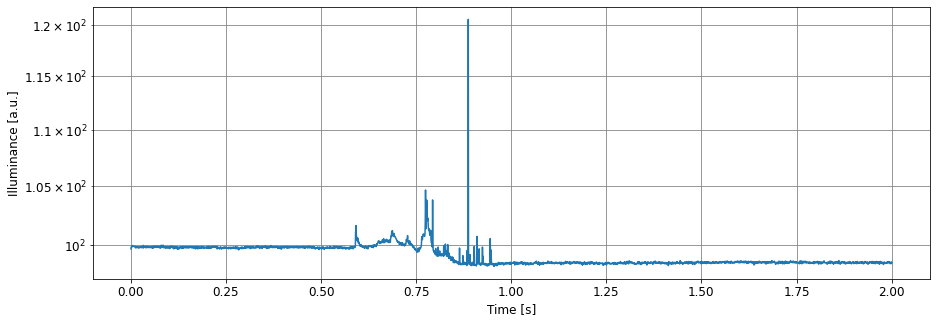

In [89]:
y = pd.read_csv(f)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

#y['time'] = (y.index - 1613)*(1/1610)
y['time'] = (y.index)*(1/1610)

plt.plot(y['time'], y['0'])
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.xticks(np.arange(0, 4000, 100))


In [ ]:
df.index = pd.to_datetime(df.index, unit='s')

In [74]:
xx = df.resample('1us', closed='left').mean()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(xx['CH2(V)'], label='antenna', alpha=0.99)
#plt.plot(df['CH1(V)'], label='antenna')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend(loc = "upper left")

plt.xlim(pd.to_datetime(0, unit='s'),pd.to_datetime(0.8, unit='s'))

plt.twinx()

#y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')
y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.615, unit='s')

plt.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.legend(loc = "upper right")
#plt.ylim(90,10e2)

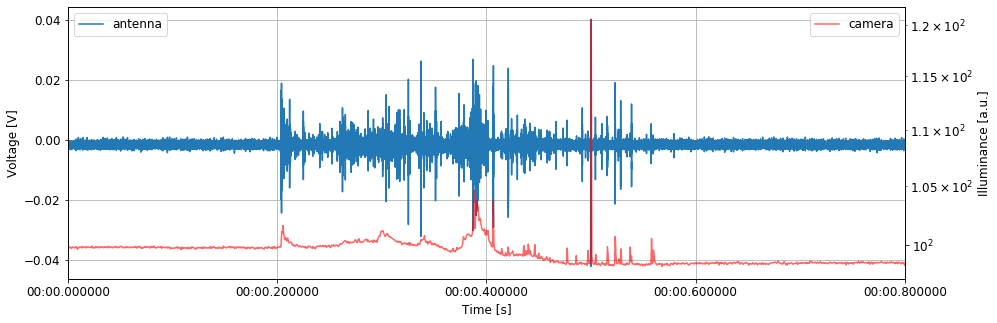

In [88]:
plt.figure(figsize=(15,5))
plt.plot(xx['CH2(V)'], label='antenna', alpha=0.99)
#plt.plot(df['CH1(V)'], label='antenna')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend(loc = "upper left")

plt.xlim(pd.to_datetime(0, unit='s'),pd.to_datetime(0.8, unit='s'))

plt.twinx()

#y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')
y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.615, unit='s')

plt.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.legend(loc = "upper right")
#plt.ylim(90,10e2)

Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is n

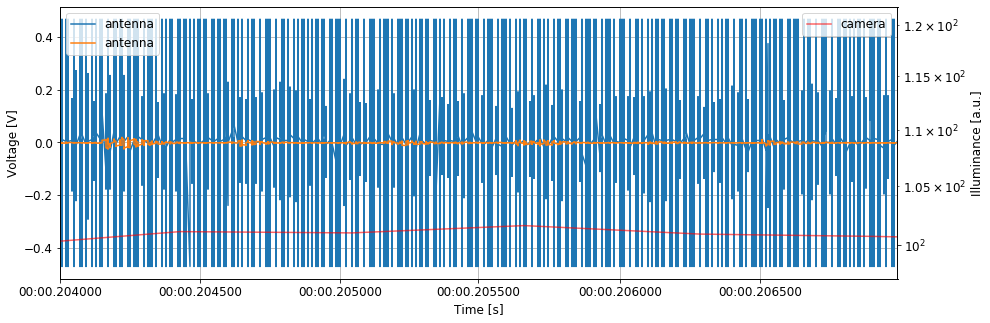

In [101]:
plt.figure(figsize=(15,5))
plt.plot(df['CH1(V)'], label='antenna')
plt.plot(xx['CH2(V)'], label='antenna', alpha=0.99)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend(loc = "upper left")

plt.xlim(pd.to_datetime(0.204, unit='s'),pd.to_datetime(0.207, unit='s'))

plt.twinx()

#y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')
y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.615, unit='s')

plt.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.legend(loc = "upper right")
#plt.ylim(90,10e2)

NameError: name 'y' is not defined

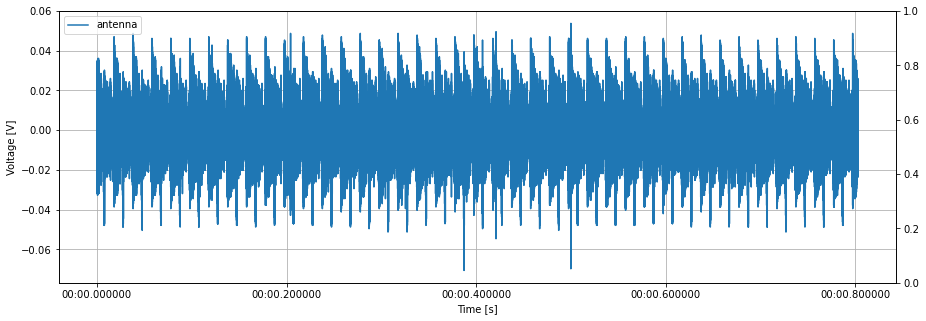

In [5]:
plt.figure(figsize=(15,5))
#df.index = pd.to_datetime(df.index, unit='s')
plt.plot(df['CH2(V)'], label='antenna')

#plt.plot(df['CH2(V)'].resample('1ms').mean(), label='antenna filt.')
#plt.plot(df['CH1(V)'], label='antenna')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend(loc = "upper left")

plt.twinx()

y['time'] = (y.index - 1613)*(1/1612.38)+0.194

plt.plot(y['time'], y['0'], c='red', alpha=0.5, label='camera')
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.legend(loc = "upper right")


In [104]:
df = df.loc[-0.15:0,'CH2(V)'].copy()

In [18]:
df=df.reset_index()

In [141]:
first = df['CH2(V)'].idxmin()
second = df.loc[first+10:,'CH2(V)'].idxmin()
second = df.loc[first+10:first+6000,'CH2(V)'].idxmin()
period = second - first

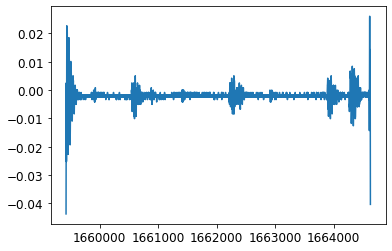

In [142]:
plt.plot(df.loc[first:second,'CH2(V)'])

In [147]:
xx = df['CH2(V)'].to_numpy()
periods = round(len(xx)/period)-1
xx = xx[:period*periods]
periodic = xx.reshape(periods, period)
avg_signal = periodic.mean(axis=0)

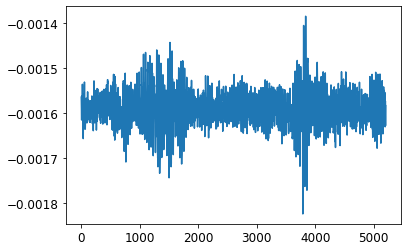

In [148]:
plt.plot(avg_signal)

In [10]:
df.index = pd.to_datetime(df.index, unit='s')

In [12]:
xx = df.resample('1us', closed='left').mean()

MemoryError: Unable to allocate 730. TiB for an array with shape (100351999000002,) and data type int64

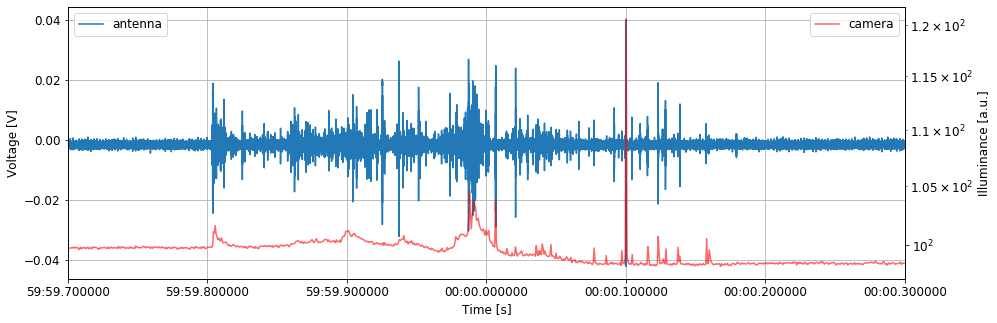

In [69]:
plt.figure(figsize=(15,5))
plt.plot(xx['CH2(V)'], label='antenna', alpha=0.99)
#plt.plot(df['CH1(V)'], label='antenna')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.legend(loc = "upper left")

plt.xlim(pd.to_datetime(-0.3, unit='s'),pd.to_datetime(0.3, unit='s'))

plt.twinx()

y['time'] = pd.to_datetime((y.index - 1613)*(1/1612.38)+0.215, unit='s')

plt.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera')
plt.yscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Illuminance [a.u.]')
plt.legend(loc = "upper right")
#plt.ylim(90,10e2)

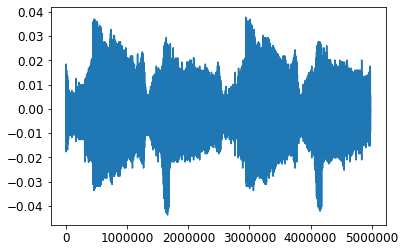

In [97]:
df.loc[:2*period,'CH2(V)'].plot()

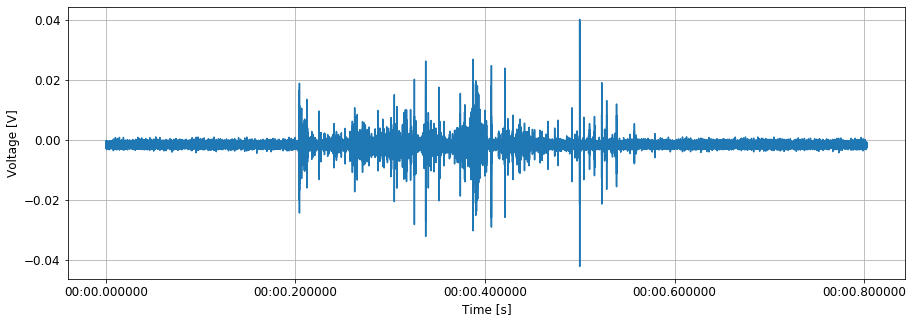

In [16]:
plt.figure(figsize=(15,5))
plt.plot(xx['CH2(V)'])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()

In [7]:
df.reset_index(inplace=True)

Text(0, 0.5, 'Voltage [V]')

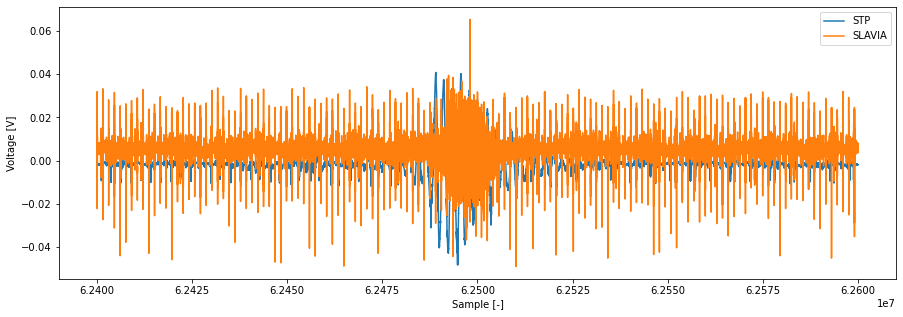

In [8]:
plt.figure(figsize=(15,5))

# CG returnstroke
f = 0.624e8
t = 0.626e8
# initiation
#f = 0.21e8
#t = 0.212e8
plt.plot(df['CH2(V)'].loc[f:t].rolling(20).mean(), label="STP")
plt.plot(df['CH1(V)'].loc[f:t].rolling(20).mean(), label="SLAVIA")
plt.legend()
plt.xlabel('Sample [-]')
plt.ylabel('Voltage [V]')



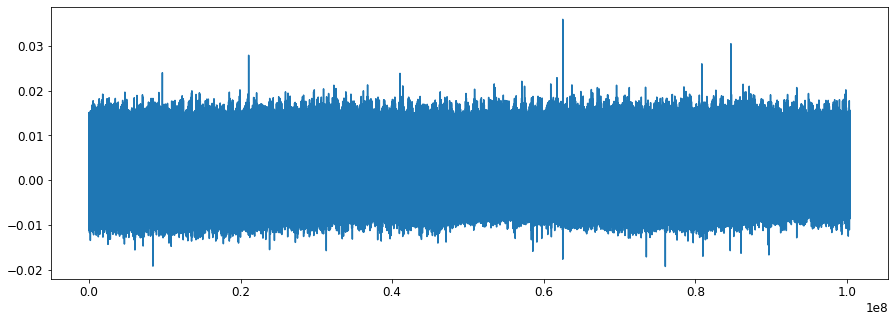

In [10]:
plt.figure(figsize=(15,5))
#df.reset_index(inplace=True)
plt.plot(df['CH1(V)'].rolling(50).mean())

In [3]:
from numpy import array
a = array(df['CH1(V)'],'float32')
output_file = open('file1.f32', 'wb')
a.tofile(output_file)
output_file.close()

## Save Luminosity to file

In [84]:
y = y.rename({'0': 'luminosity'}, axis = 1)
y.set_index('time', inplace=True)
cols_to_keep = ['luminosity']
y.loc[:, cols_to_keep].to_hdf('luminosity.hdf','df', mode='w')


,Unnamed: 0,luminosity
time,,
1969-12-31 23:59:59.614615476,0,99.706557
1969-12-31 23:59:59.615235677,1,99.852945
1969-12-31 23:59:59.615855878,2,99.842566
1969-12-31 23:59:59.616476079,3,99.865827
1969-12-31 23:59:59.617096281,4,99.951296
...,...,...
1970-01-01 00:00:01.609802714,3217,98.479353
1970-01-01 00:00:01.610422915,3218,98.544715
1970-01-01 00:00:01.611043116,3219,98.631330


In [94]:
df

,CH1(V),CH2(V)
time,,
1970-01-01 00:00:00.000000000,0.000000,-0.001681
1970-01-01 00:00:00.000000008,0.007356,-0.001681
1970-01-01 00:00:00.000000016,-0.003678,-0.001681
1970-01-01 00:00:00.000000024,0.007356,-0.000841
1970-01-01 00:00:00.000000032,0.011034,-0.000841
...,...,...
1970-01-01 00:00:00.802815960,0.003678,-0.000841
1970-01-01 00:00:00.802815968,0.000000,-0.000841
1970-01-01 00:00:00.802815976,0.011034,-0.001681


In [3]:
z=pd.read_hdf('luminosity.hdf')
z

,luminosity
time,
1969-12-31 23:59:59.614615476,99.706557
1969-12-31 23:59:59.615235677,99.852945
1969-12-31 23:59:59.615855878,99.842566
1969-12-31 23:59:59.616476079,99.865827
1969-12-31 23:59:59.617096281,99.951296
...,...
1970-01-01 00:00:01.609802714,98.479353
1970-01-01 00:00:01.610422915,98.544715
1970-01-01 00:00:01.611043116,98.631330


In [5]:
df=pd.read_hdf(file+'.hdf')
df

pandas.core.frame.DataFrame